# ACT-R Simon Task

This script is to play with the ACT-R Simon Model created by A.S.(2017)

<img src="https://ars.els-cdn.com/content/image/1-s2.0-S0010027717300598-gr6.jpg" width="400"/>

# ACT-R Stroop Task
<img src="https://www.biorxiv.org/content/biorxiv/early/2019/05/24/647271/F1.large.jpg?width=800&height=600&carousel=1" width="600"/>

# ACT-R PSS Task

Paper: https://www.researchgate.net/publication/341742283_Reliable_Idiographic_Parameters_From_Noisy_Behavioral_Data_The_Case_of_Individual_Differences_in_a_Reinforcement_Learning_Task

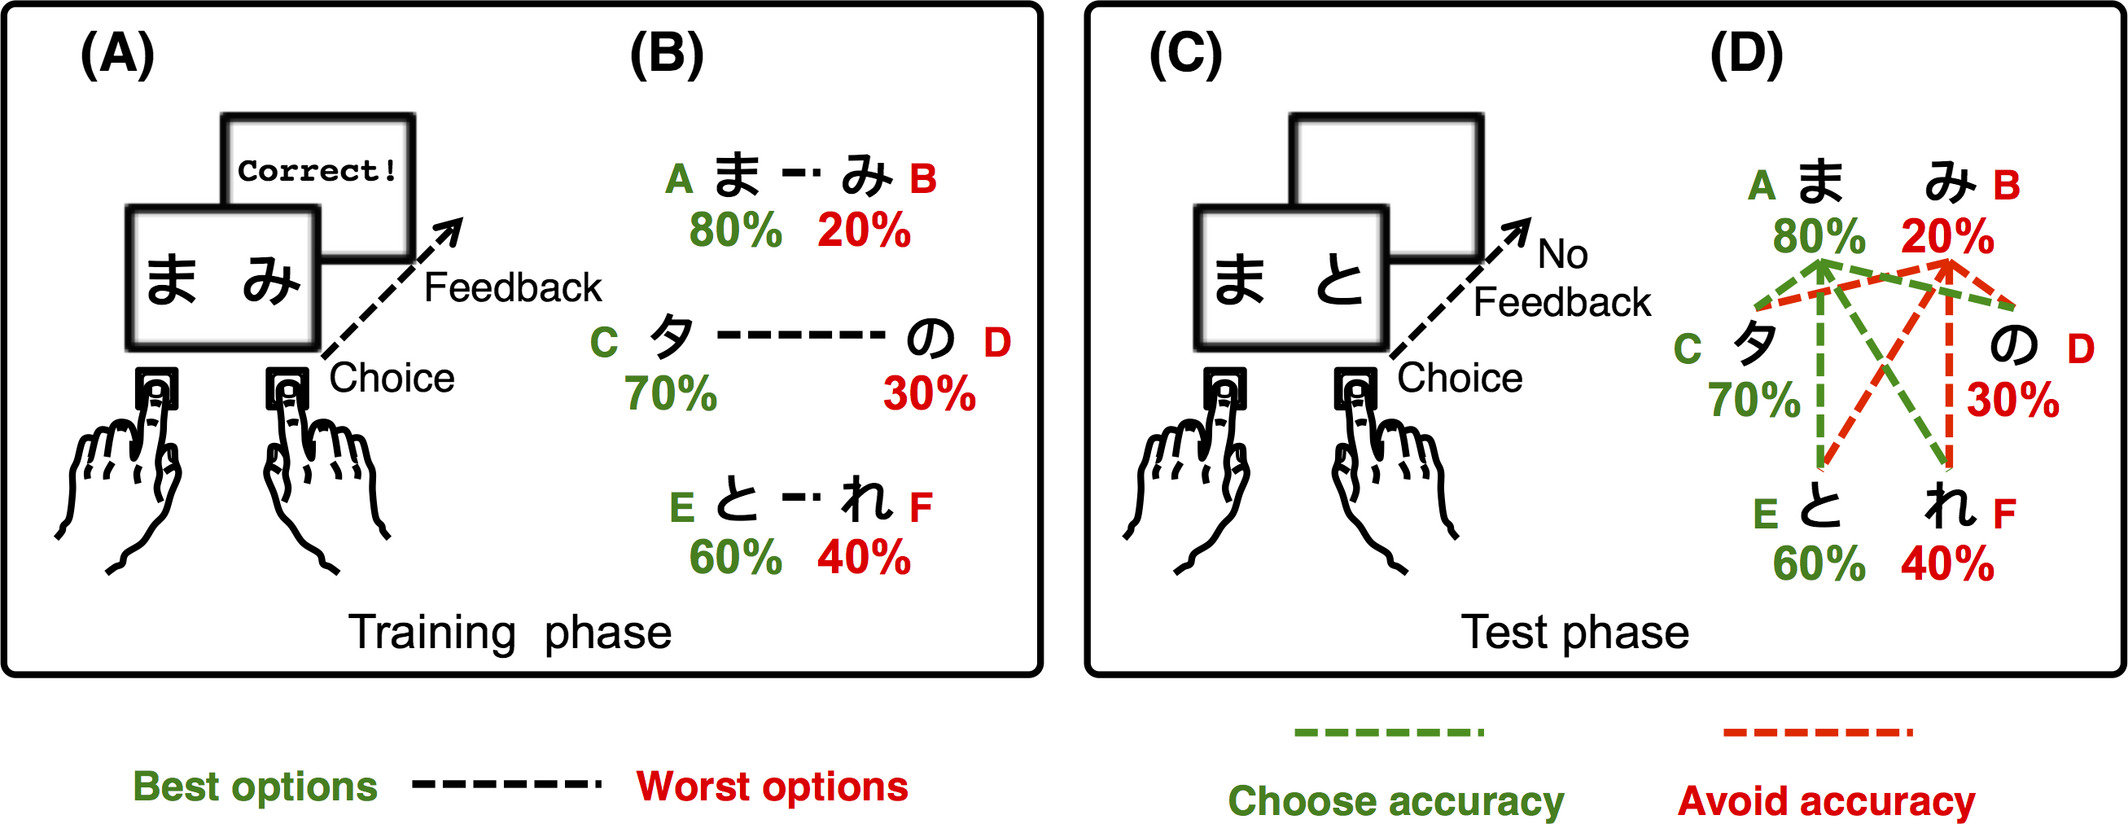
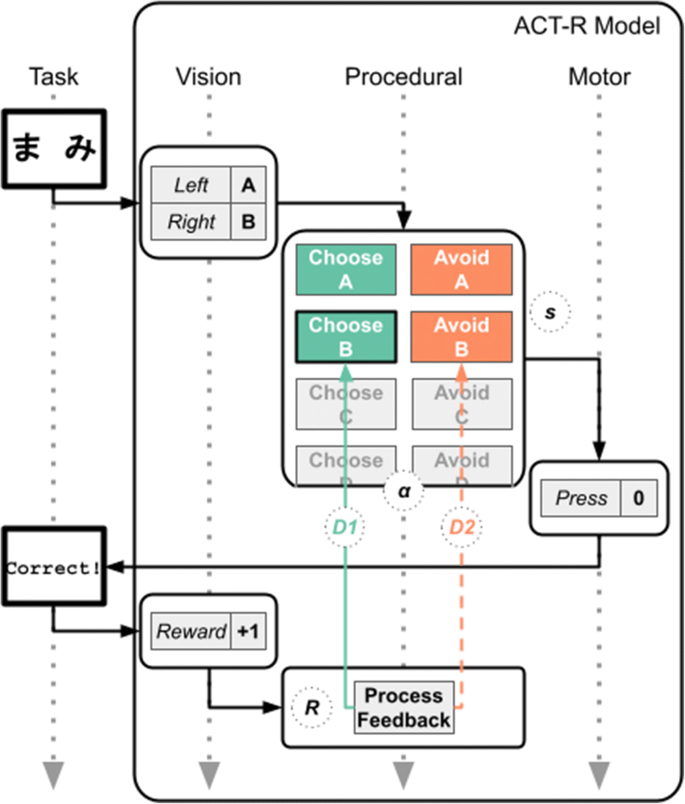

## Some thoghts

1. why post-error slowing? 
2. how to introduce fatigue?  

In [14]:
from simon_device import *
import actr
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
task = run_experiment(model="simon-model2", visible=True, trace=True, reload=False)

# CONGRUENT (N=20): Accuracy = 1.00, Response Times = 811.55 ms
# INCONGRUENT (N=20): Accuracy = 0.70, Response Times = 976.85 ms

In [72]:
task = run_experiment((model="simon-model2", visible=False, trace=False, param_set={"ans":0.1, "le":0.1})

# CONGRUENT (N=20): Accuracy = 1.00, Response Times = 1318.40 ms
# INCONGRUENT (N=20): Accuracy = 0.65, Response Times = 1812.15 ms

######### LOADED MODEL COMPETITIVE-SIMON-PY #########
>> {'seed': [100, 0], 'ans': 0.1, 'le': 0.1, 'mas': 4.0, 'egs': 0.1, 'alpha': 0.4, 'imaginal-activation': 3.0, 'motor-feature-prep-time': 0.01} <<
--------------------------------------------------------------------------------
CONGRUENT (N=20): Accuracy = 1.00, Response Times = 1318.40 ms
INCONGRUENT (N=20): Accuracy = 0.65, Response Times = 1812.15 ms


In [73]:
model_error(model="simon-model2", n=1)

# MODEL (RMSE): (ACCURACY: 0.1281 	RT: 0.4419)

######### LOADED MODEL COMPETITIVE-SIMON-PY #########
>> {'seed': [100, 0], 'ans': 0.5, 'le': 0.63, 'mas': 4.0, 'egs': 0.1, 'alpha': 0.4, 'imaginal-activation': 3.0, 'motor-feature-prep-time': 0.01} <<
MODEL (RMSE): (ACCURACY: 0.1281 	RT: 0.4419)


(0.1281, 0.4419)

In [74]:
model_error(model="simon-model2", param_set={"ans":0.1, "le":0.1}, n=1)

#MODEL (RMSE): (ACCURACY: 0.1632 	RT: 1.1305)

######### LOADED MODEL COMPETITIVE-SIMON-PY #########
>> {'seed': [100, 0], 'ans': 0.1, 'le': 0.1, 'mas': 4.0, 'egs': 0.1, 'alpha': 0.4, 'imaginal-activation': 3.0, 'motor-feature-prep-time': 0.01} <<
MODEL (RMSE): (ACCURACY: 0.1632 	RT: 1.1305)


(0.1632, 1.1305)

In [75]:
simulate_behavior("simon-model2", n=1)

#(array([[1. , 0.7]]), array([[0.81155, 0.97685]]))

######### LOADED MODEL COMPETITIVE-SIMON-PY #########
>> {'seed': [100, 0], 'ans': 0.5, 'le': 0.63, 'mas': 4.0, 'egs': 0.1, 'alpha': 0.4, 'imaginal-activation': 3.0, 'motor-feature-prep-time': 0.01} <<


(array([[1. , 0.7]]), array([[0.81155, 0.97685]]))

## Post Error Slowing

This Simon model can capture post-error slowing effects

In [127]:
def df_model_data(sessions):
    df_list = []
    for i in range(len(sessions)):
        df_curr = pd.DataFrame.from_dict(sessions[i].run_stats()).T.reset_index()
        df_curr.columns = ["condition", "n", "accuracy", "response_time"]
        df_curr["session"] = i
        df_list.append(df_curr)
        
    return pd.concat(df_list, axis=0)

In [128]:
def df_post_error_rt(sessions):
    df_list = []
    for i in range(len(sessions)):
        corrects = []
        errors = []
        for j in range(len(sessions[i].log)-1):
            if sessions[i].log[j].accuracy==0:
                errors.append(sessions[i].log[j+1])
            else:
                corrects.append(sessions[i].log[j+1])
        df_corrects = pd.DataFrame({'response_time':[x.response_time for x in corrects], 
                                    'trial_type':["post_correct"]*len(corrects)})
        df_errors = pd.DataFrame({'response_time':[x.response_time for x in errors], 
                                  'trial_type':["post_errors"]*len(errors)})
        df_curr = pd.concat([df_corrects, df_errors], axis=0)
        df_curr["session"]=i
        df_list.append(df_curr)
    return pd.concat(df_list)

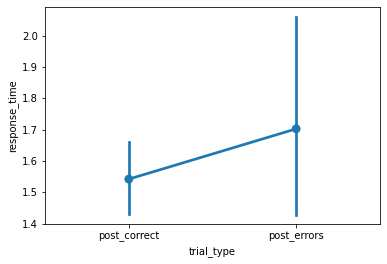

In [78]:
df1 = df_post_error_rt([task])
ax = sns.pointplot(x="trial_type", y="response_time", data=df1)

## Practice effects

Model shows practice effects: faster RT for session4, and higher accuracy for session4

In [79]:
session1 = run_experiment(visible=False, trace=False, reload=True)
session2 = run_experiment(visible=False, trace=False, reload=False)
session3 = run_experiment(visible=False, trace=False, reload=False)
session4 = run_experiment(visible=False, trace=False, reload=False)

######### LOADED MODEL COMPETITIVE-SIMON-PY #########
>> {'seed': [100, 0], 'ans': 0.5, 'le': 0.63, 'mas': 4.0, 'egs': 0.1, 'alpha': 0.4, 'imaginal-activation': 3.0, 'motor-feature-prep-time': 0.01} <<
--------------------------------------------------------------------------------
CONGRUENT (N=20): Accuracy = 1.00, Response Times = 811.55 ms
INCONGRUENT (N=20): Accuracy = 0.70, Response Times = 976.85 ms
--------------------------------------------------------------------------------
CONGRUENT (N=20): Accuracy = 1.00, Response Times = 866.25 ms
INCONGRUENT (N=20): Accuracy = 0.70, Response Times = 1024.45 ms
--------------------------------------------------------------------------------
CONGRUENT (N=20): Accuracy = 1.00, Response Times = 811.00 ms
INCONGRUENT (N=20): Accuracy = 0.75, Response Times = 1078.55 ms
--------------------------------------------------------------------------------
CONGRUENT (N=20): Accuracy = 1.00, Response Times = 782.90 ms
INCONGRUENT (N=20): Accuracy = 0

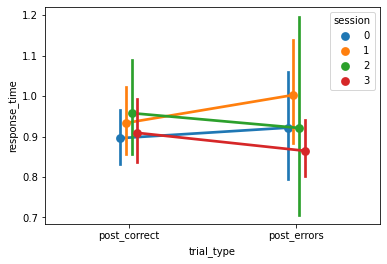

In [80]:
df2 = df_post_error_rt([session1, session2, session3, session4])
ax = sns.pointplot(x="trial_type", y="response_time", data=df2, hue="session", dodge=True, height=4, aspect=0.7)

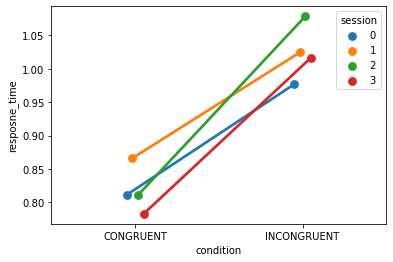

In [81]:
df3= df_model_data([session1, session2, session3, session4])
ax = sns.pointplot(x="condition", y="resposne_time", hue="session", data=df3,
                  dodge=True, height=4, aspect=0.7)

## Fatigue effect

In [82]:
n_sessions = 50
long_sessions = [run_experiment(visible=False, trace=False, reload=True)]

for i in range(n_sessions):
    curr_session = run_experiment(visible=False, trace=False, reload=False)
    long_sessions.append(curr_session)

######### LOADED MODEL COMPETITIVE-SIMON-PY #########
>> {'seed': [100, 0], 'ans': 0.5, 'le': 0.63, 'mas': 4.0, 'egs': 0.1, 'alpha': 0.4, 'imaginal-activation': 3.0, 'motor-feature-prep-time': 0.01} <<
--------------------------------------------------------------------------------
CONGRUENT (N=20): Accuracy = 1.00, Response Times = 811.55 ms
INCONGRUENT (N=20): Accuracy = 0.70, Response Times = 976.85 ms
--------------------------------------------------------------------------------
CONGRUENT (N=20): Accuracy = 1.00, Response Times = 866.25 ms
INCONGRUENT (N=20): Accuracy = 0.70, Response Times = 1024.45 ms
--------------------------------------------------------------------------------
CONGRUENT (N=20): Accuracy = 1.00, Response Times = 811.00 ms
INCONGRUENT (N=20): Accuracy = 0.75, Response Times = 1078.55 ms
--------------------------------------------------------------------------------
CONGRUENT (N=20): Accuracy = 1.00, Response Times = 782.90 ms
INCONGRUENT (N=20): Accuracy = 0

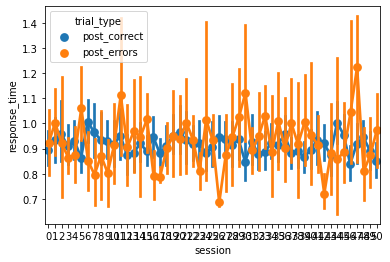

In [86]:
dfe = df_post_error_rt(long_sessions)
ax = sns.pointplot(x="session", y="response_time", data=df, hue="trial_type", 
                   dodge=True, height=4, aspect=0.7)

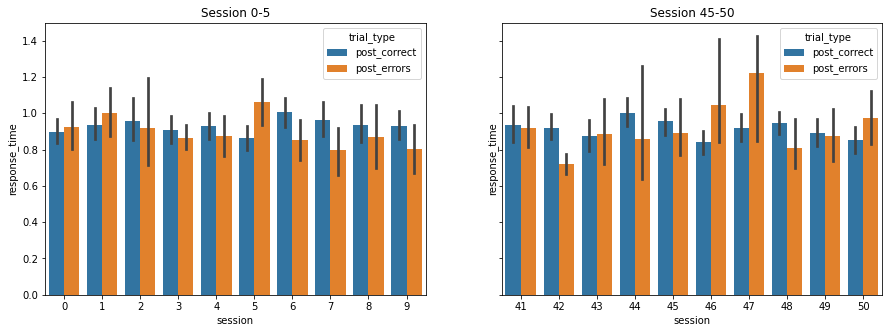

In [119]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
sns.barplot(x="session", y="response_time", hue="trial_type", data=dfe[dfe["session"]<10], ax=ax1)
sns.barplot(x="session", y="response_time", hue="trial_type", data=dfe[dfe["session"]>40], ax=ax2)
ax1.set_title('Session 0-5')
ax2.set_title('Session 45-50')
plt.show()

In [129]:
dfm = df_model_data(long_sessions)

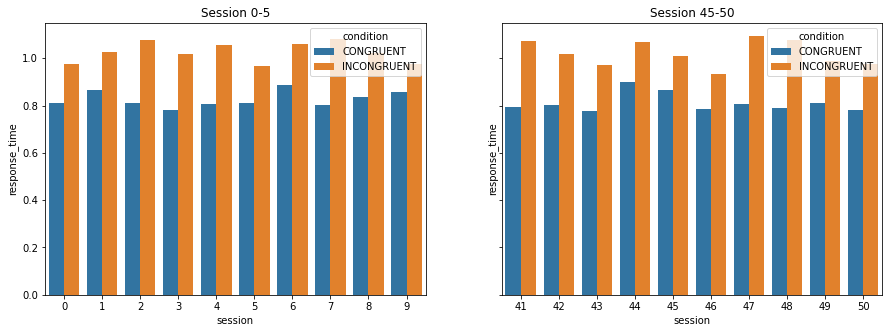

In [130]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
sns.barplot(x="session", y="response_time", hue="condition", data=dfm[dfm["session"]<10], ax=ax1)
sns.barplot(x="session", y="response_time", hue="condition", data=dfm[dfm["session"]>40], ax=ax2)
ax1.set_title('Session 0-5')
ax2.set_title('Session 45-50')
plt.show()